# WASSA 2023 - Exploratory data analysis (EDA)
### Shared Task on Empathy Emotion and Personality Detection in Interactions

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import Datasets

In [28]:
# read training, developement and test essay level data
train_essay_data = pd.read_csv('./datasets/WASSA23_essay_level_full_train_preproc.tsv', sep="\t")
dev_essay_data = pd.read_csv('./datasets/WASSA23_essay_level_dev_preproc.tsv', sep="\t")
test_essay_data = pd.read_csv('./datasets/WASSA23_essay_level_test_preproc.tsv', sep="\t")

In [31]:
train_essay_data[:2]

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,1,train,1,Hope/Sadness
1,24,281,I just read a really interesting but depressin...,6.000000,2.125,20,1,3,1,33,...,6.5,6.5,3.714,2.286,3.286,4.571,1,train,23,Hope/Sadness


In [32]:
test_essay_data[:4]

,conversation_id,article_id,essay,speaker_id,gender,education,race,age,income,speaker_number,split,essay_id
0,1192,6,"hi my dear friend, how r you?. Are you used in...",45,2,6,1,25,50000,2,test,0
1,1192,6,The loss of human life is always a tragic even...,65,1,6,1,34,30000,1,test,1
2,1059,6,"Hello mate, it's been a long time since I met ...",53,2,6,1,64,40000,2,test,2
3,1059,6,us America and the security council adopts res...,92,2,6,1,35,5000,1,test,3


### Datasets dimensions

In [29]:
emotions = set()
emotion_labels = train_essay_data['emotion'].unique()
for label in emotion_labels:
    emotions.update(label.split("/"))

display(emotions)
print('Emotions cardinality: %d' %len(emotions))

{'Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise'}

Emotions cardinality: 8


In [33]:
print('Train set dimension: %d' %len(train_essay_data))
print('Dev set dimension: %d' %len(dev_essay_data))
print('Test+Train set dimension: %d' %(len(train_essay_data) + len(dev_essay_data)))
print('Test set dimension: %d' %len(test_essay_data))

Train set dimension: 792
Dev set dimension: 208
Test+Train set dimension: 1000
Test set dimension: 100


### Emotion distribution across datasets

In [68]:
train_counts = pd.DataFrame(train_essay_data[emotions].sum(), columns=['Training set'])
train_perc = pd.DataFrame(train_essay_data[emotions].sum()/len(train_essay_data)*100, columns=['% Training set'])
dev_counts = pd.DataFrame(dev_essay_data[emotions].sum(), columns=['Development set'])
dev_perc = pd.DataFrame(dev_essay_data[emotions].sum()/len(dev_essay_data)*100, columns=['% Development set'])


pd.concat([train_counts, dev_counts, train_perc, dev_perc], axis=1)

C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\2171479477.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_counts = pd.DataFrame(train_essay_data[emotions].sum(), columns=['Training set'])
C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\2171479477.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_perc = pd.DataFrame(train_essay_data[emotions].sum()/len(train_essay_data)*100, columns=['% Training set'])
C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\2171479477.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dev_counts = pd.DataFrame(dev_essay_data[emotions].sum(), columns=['Development set'])
C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\2171479477.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a

,Training set,Development set,% Training set,% Development set
Hope,32,16,4.040404,7.692308
Surprise,19,3,2.398990,1.442308
Sadness,383,101,48.358586,48.557692
Joy,10,2,1.262626,0.961538
Neutral,240,54,30.303030,25.961538
Disgust,100,24,12.626263,11.538462
Fear,33,8,4.166667,3.846154
Anger,124,38,15.656566,18.269231


C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\3458791515.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_essay_data[emotions].sum().plot(kind='bar', ax=ax1)
C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\3458791515.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dev_essay_data[emotions].sum().plot(kind='bar', ax=ax2)


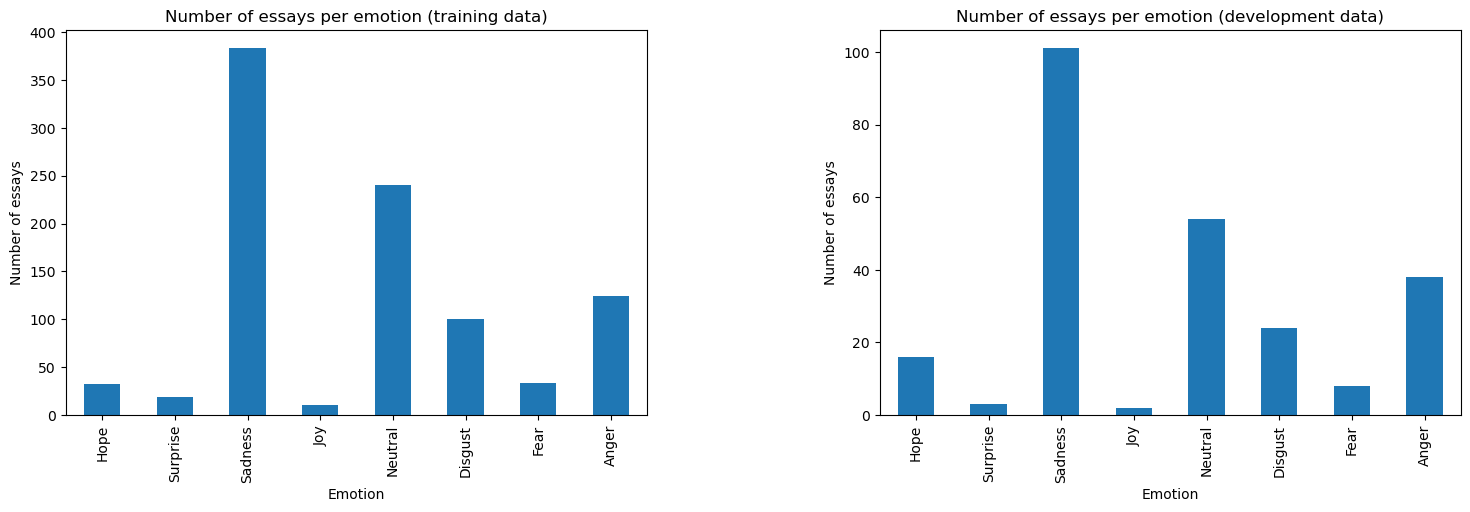

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Training data
train_essay_data[emotions].sum().plot(kind='bar', ax=ax1)
ax1.set_title('Number of essays per emotion (training data)')
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Number of essays')

# Development data
dev_essay_data[emotions].sum().plot(kind='bar', ax=ax2)
ax2.set_title('Number of essays per emotion (development data)')
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Number of essays')


plt.subplots_adjust(wspace=0.4)
plt.show()

### Demographic Categorical Attributes

In [69]:
test_essay_data.columns.tolist()

['conversation_id',
 'article_id',
 'essay',
 'speaker_id',
 'gender',
 'education',
 'race',
 'age',
 'income',
 'speaker_number',
 'split',
 'essay_id']

In [158]:
# Count demographic categorical attributes
counts = {}
categorical_attributes = ['gender', 'education', 'race', 'age', 'income']
for attribute in categorical_attributes:
    counts[attribute] = train_essay_data[attribute].value_counts().to_dict()

In [159]:
print(counts['gender']) # in {1, 2}
print(counts['education']) # in rage [1, 7]
print(counts['race']) # in rage [1, 6]

{1: 486, 2: 293}
{6: 431, 4: 112, 7: 102, 3: 61, 2: 42, 5: 31}
{'1': 524, '3': 99, '2': 96, '5': 59, '6': 1}


In [92]:
del counts['age']['unknown'] # delete features with unknown data
print('Age between %s and %s years' %(min(counts['age']), max(counts['age'])))

Age between 20 and 62 years


In [93]:
del counts['income']['unknown'] # delete features with unknown data
print('Income between %s and %s' %(min(counts['income']), max(counts['income'])))

Income between 10000 and 89000


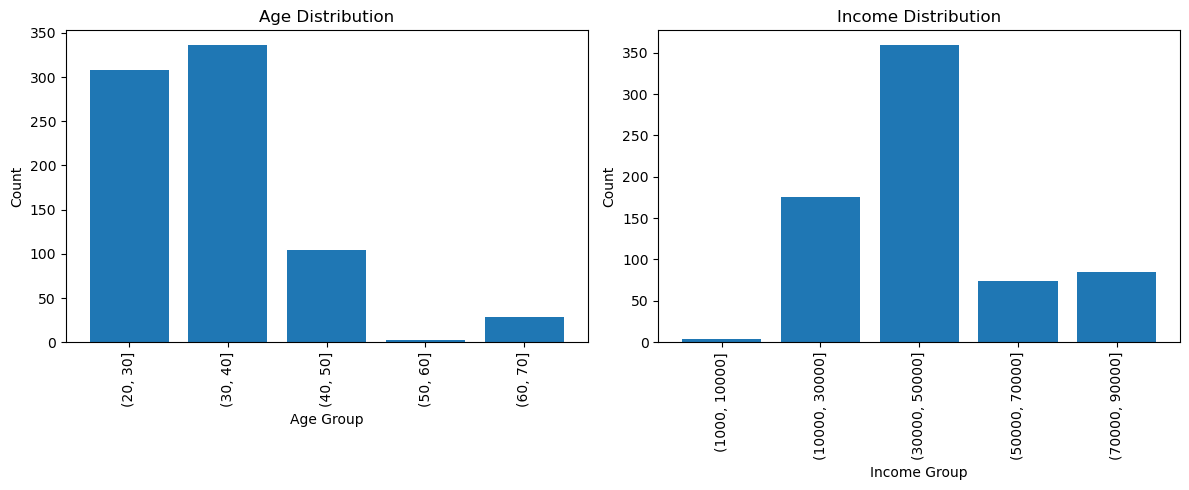

In [160]:
import matplotlib.pyplot as plt

# Convert "age" and "income" column to numeric type
train_essay_data['age'] = pd.to_numeric(train_essay_data['age'], errors='coerce')
train_essay_data['income'] = pd.to_numeric(train_essay_data['income'], errors='coerce')

# Age and income bins
age_bins = [20, 30, 40, 50, 60, 70]  # Define the desired age bins
income_bins = [1000, 10000, 30000, 50000, 70000, 90000]  # Define the desired income bins

# Compute counts for age and income bins
age_counts = pd.cut(train_essay_data['age'], age_bins).value_counts().sort_index()
income_counts = pd.cut(train_essay_data['income'], income_bins).value_counts().sort_index()

# Create the bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for age
ax1.bar(age_counts.index.astype(str), age_counts.values)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')

# Histogram for income
ax2.bar(income_counts.index.astype(str), income_counts.values)
ax2.set_title('Income Distribution')
ax2.set_xlabel('Income Group')
ax2.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\2214462465.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  counts_gender1[emotion] = selected_data[selected_data['gender'] == '1'][mask].shape[0]
C:\Users\giuli\AppData\Local\Temp\ipykernel_61212\2214462465.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  counts_gender2[emotion] = selected_data[selected_data['gender'] == '2'][mask].shape[0]


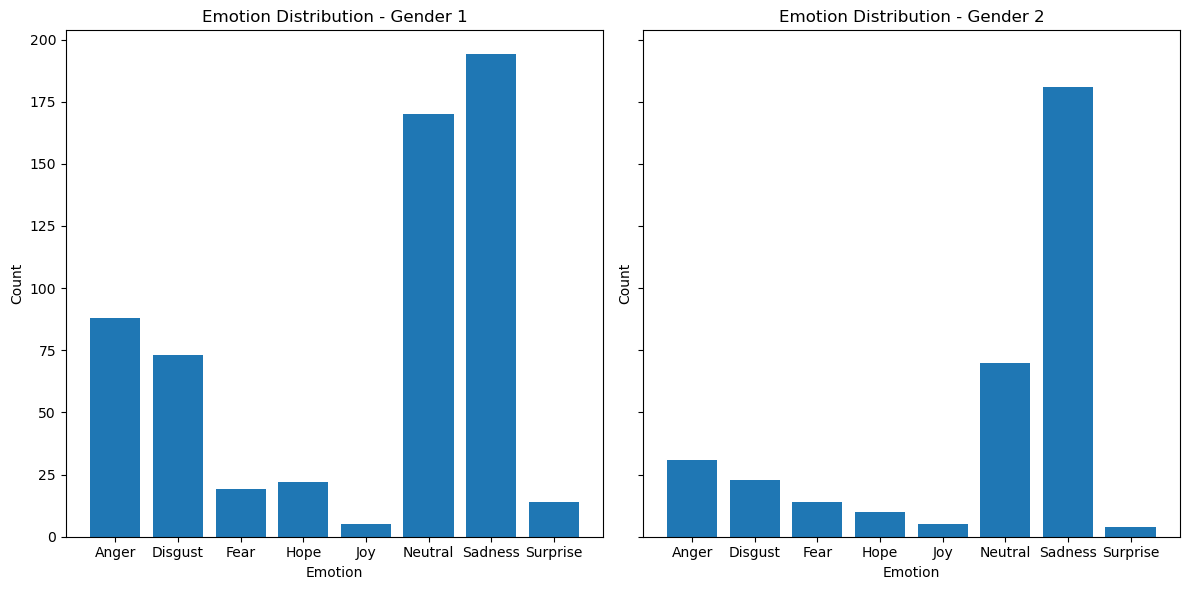

In [132]:
# Select the relevant columns
selected_columns = ['gender', 'emotion']
selected_data = train_essay_data[selected_columns]

# Create a mask for each emotion label
emotion_masks = {
    'Anger': selected_data['emotion'].str.contains('Anger'),
    'Disgust': selected_data['emotion'].str.contains('Disgust'),
    'Fear': selected_data['emotion'].str.contains('Fear'),
    'Hope': selected_data['emotion'].str.contains('Hope'),
    'Joy': selected_data['emotion'].str.contains('Joy'),
    'Neutral': selected_data['emotion'].str.contains('Neutral'),
    'Sadness': selected_data['emotion'].str.contains('Sadness'),
    'Surprise': selected_data['emotion'].str.contains('Surprise')
}

# Initialize the counts dictionaries for each gender
counts_gender1 = {emotion: 0 for emotion in emotion_masks}
counts_gender2 = {emotion: 0 for emotion in emotion_masks}

# Count the occurrences for each emotion label and gender
for emotion, mask in emotion_masks.items():
    counts_gender1[emotion] = selected_data[selected_data['gender'] == '1'][mask].shape[0]
    counts_gender2[emotion] = selected_data[selected_data['gender'] == '2'][mask].shape[0]

# Convert the dictionaries to separate lists
emotions = list(counts_gender1.keys())
count_values_gender1 = list(counts_gender1.values())
count_values_gender2 = list(counts_gender2.values())

# Set the figure size
plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

# Plot the bar plots side by side
plt.subplot(1, 2, 1)
plt.bar(emotions, count_values_gender1)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution - Gender 1')

plt.subplot(1, 2, 2)
plt.bar(emotions, count_values_gender2)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution - Gender 2')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [137]:
count_gender_1 = train_essay_data[train_essay_data['gender'] == '1'].shape[0]
print('Occurences of Gender 1: %d' %count_gender_1)

count_gender_2 = train_essay_data[train_essay_data['gender'] == '2'].shape[0]
print('Occurences of Gender 2: %d' %count_gender_2)


Occurences of Gender 1: 486
Occurences of Gender 2: 293


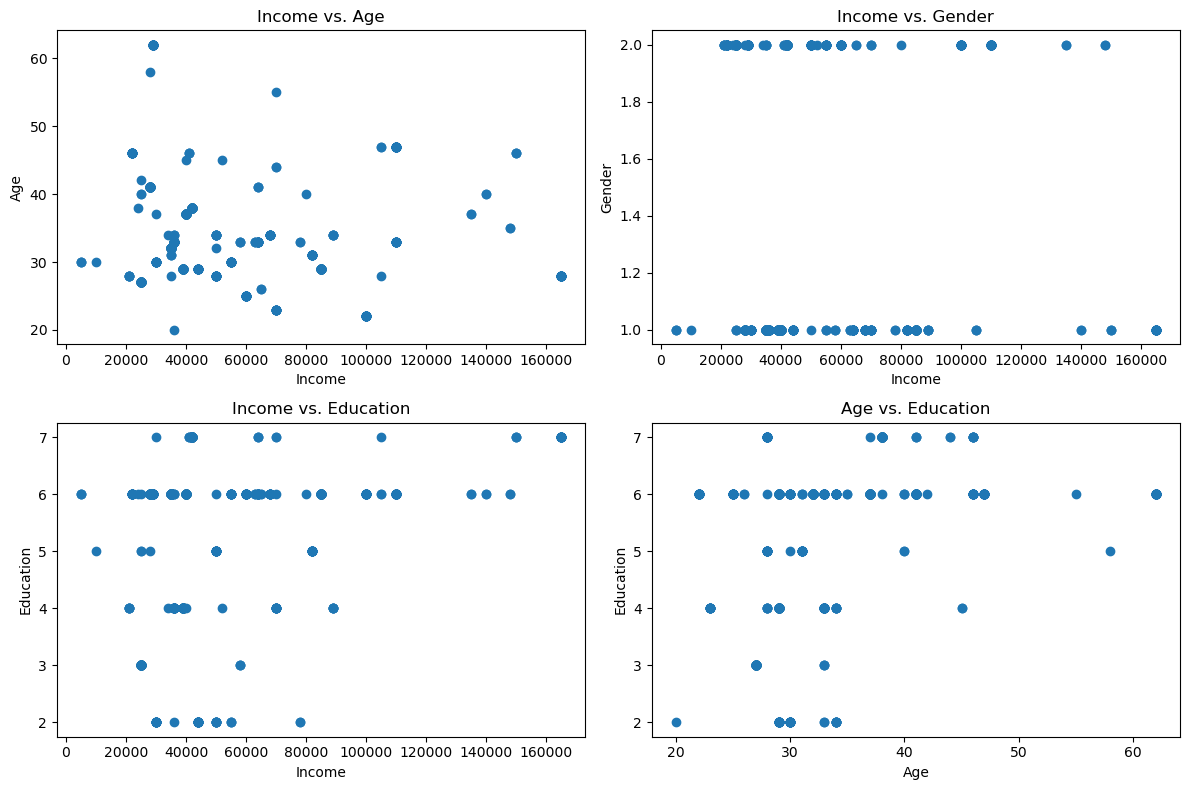

In [141]:
# Remove rows with 'unknown' values
train_essay_data = train_essay_data[train_essay_data != 'unknown'].dropna()

# Convert numeric columns to numeric values
train_essay_data['income'] = pd.to_numeric(train_essay_data['income'], errors='coerce')
train_essay_data['age'] = pd.to_numeric(train_essay_data['age'], errors='coerce')
train_essay_data['gender'] = pd.to_numeric(train_essay_data['gender'], errors='coerce')
train_essay_data['education'] = pd.to_numeric(train_essay_data['education'], errors='coerce')

# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot for 'income' vs. 'age'
axs[0, 0].scatter(train_essay_data['income'], train_essay_data['age'])
axs[0, 0].set_xlabel('Income')
axs[0, 0].set_ylabel('Age')
axs[0, 0].set_title('Income vs. Age')

# Scatter plot for 'income' vs. 'gender'
axs[0, 1].scatter(train_essay_data['income'], train_essay_data['gender'])
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Gender')
axs[0, 1].set_title('Income vs. Gender')

# Scatter plot for 'income' vs. 'education'
axs[1, 0].scatter(train_essay_data['income'], train_essay_data['education'])
axs[1, 0].set_xlabel('Income')
axs[1, 0].set_ylabel('Education')
axs[1, 0].set_title('Income vs. Education')

# Scatter plot for 'age' vs. 'education'
axs[1, 1].scatter(train_essay_data['age'], train_essay_data['education'])
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Education')
axs[1, 1].set_title('Age vs. Education')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [156]:
# Define the desired emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']

# Define the income, age, and education ranges
income_ranges = [10000, 30000, 50000, 70000, 90000]
age_ranges = [20, 30, 40, 50, 60, 70]
education_ranges = [1, 2, 3, 4, 5, 6, 7, 8]

# Create a new column for income range
train_essay_data['income_range'] = pd.cut(train_essay_data['income'], bins=income_ranges, labels=income_ranges[:-1], right=False)

# Create a new column for age range
train_essay_data['age_range'] = pd.cut(train_essay_data['age'], bins=age_ranges, labels=age_ranges[:-1], right=False)

# Create a new column for education range
train_essay_data['education_range'] = pd.cut(train_essay_data['education'], bins=education_ranges, labels=education_ranges[:-1], right=False)

# Group the data by emotion and income range
grouped_income = train_essay_data.groupby(['primary_emotion', 'income_range']).size().reset_index(name='count')

# Filter out any emotions that are not in the desired emotion labels
grouped_income = grouped_income[grouped_income['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and income ranges as rows
income_table = grouped_income.pivot(index='income_range', columns='primary_emotion', values='count')

# Group the data by emotion and age range
grouped_age = train_essay_data.groupby(['primary_emotion', 'age_range']).size().reset_index(name='count')

# Filter out any emotions that are not in the desired emotion labels
grouped_age = grouped_age[grouped_age['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and age ranges as rows
age_table = grouped_age.pivot(index='age_range', columns='primary_emotion', values='count')

# Group the data by emotion and education range
grouped_education = train_essay_data.groupby(['primary_emotion', 'education_range']).size().reset_index(name='count')

# Filter out any emotions that are not in the desired emotion labels
grouped_education = grouped_education[grouped_education['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and education ranges as rows
education_table = grouped_education.pivot(index='education_range', columns='primary_emotion', values='count')

# Display the table for grouped by income range
print("Grouped by Income Range:")
print(income_table)

# Display the table for grouped by age range
print("\nGrouped by Age Range:")
print(age_table)

# Display the table for grouped by education range
print("\nGrouped by Education Range:")
print(education_table)


Grouped by Income Range:
primary_emotion  Anger  Disgust  Fear  Hope  Joy  Neutral  Sadness  Surprise
income_range                                                                
10000               23        9     2     4    2       29       54         0
30000               30       21     2     5    3      112      114         5
50000                4        3     3     0    0       22       36         3
70000                6        9     2     1    0       14       51         0

Grouped by Age Range:
primary_emotion  Anger  Disgust  Fear  Hope  Joy  Neutral  Sadness  Surprise
age_range                                                                   
20                  11       15     7     7    0       60      126         2
30                  32       23     2     3    3      109      121         7
40                  19        3     1     0    1       25       35         0
50                   0        0     0     0    0        1        1         0
60                   3      

In [161]:
# Define the desired emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']

# Define the income, age, and education ranges
income_ranges = [10000, 30000, 50000, 70000, 90000]
age_ranges = [20, 30, 40, 50, 60, 70]
education_ranges = [1, 2, 3, 4, 5, 6, 7, 8]

# Create a new column for income range
train_essay_data['income_range'] = pd.cut(train_essay_data['income'], bins=income_ranges, labels=income_ranges[:-1], right=False)

# Create a new column for age range
train_essay_data['age_range'] = pd.cut(train_essay_data['age'], bins=age_ranges, labels=age_ranges[:-1], right=False)

# Create a new column for education range
train_essay_data['education_range'] = pd.cut(train_essay_data['education'], bins=education_ranges, labels=education_ranges[:-1], right=False)

# Calculate total count for each emotion
total_counts = train_essay_data['primary_emotion'].value_counts()

# Group the data by emotion and income range and calculate percentages
grouped_income = train_essay_data.groupby(['primary_emotion', 'income_range']).size().reset_index(name='count')
grouped_income['percentage'] = grouped_income['count'] / grouped_income.groupby('primary_emotion')['count'].transform('sum') * 100

# Filter out any emotions that are not in the desired emotion labels
grouped_income = grouped_income[grouped_income['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and income ranges as rows
income_table = grouped_income.pivot(index='income_range', columns='primary_emotion', values='percentage')

# Group the data by emotion and age range and calculate percentages
grouped_age = train_essay_data.groupby(['primary_emotion', 'age_range']).size().reset_index(name='count')
grouped_age['percentage'] = grouped_age['count'] / grouped_age.groupby('primary_emotion')['count'].transform('sum') * 100

# Filter out any emotions that are not in the desired emotion labels
grouped_age = grouped_age[grouped_age['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and age ranges as rows
age_table = grouped_age.pivot(index='age_range', columns='primary_emotion', values='percentage')

# Group the data by emotion and education range and calculate percentages
grouped_education = train_essay_data.groupby(['primary_emotion', 'education_range']).size().reset_index(name='count')
grouped_education['percentage'] = grouped_education['count'] / grouped_education.groupby('primary_emotion')['count'].transform('sum') * 100

# Filter out any emotions that are not in the desired emotion labels
grouped_education = grouped_education[grouped_education['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and education ranges as rows
education_table = grouped_education.pivot(index='education_range', columns='primary_emotion', values='percentage')

# Display the table for grouped by income range
print("Grouped by Income Range:")
print(income_table.to_string())

# Display the table for grouped by age range
print("\nGrouped by Age Range:")
print(age_table.to_string())

# Display the table for grouped by education range
print("\nGrouped by Education Range:")
print(education_table.to_string())


Grouped by Income Range:
primary_emotion      Anger    Disgust       Fear  Hope   Joy    Neutral    Sadness  Surprise
income_range                                                                                
10000            36.507937  21.428571  22.222222  40.0  40.0  16.384181  21.176471       0.0
30000            47.619048  50.000000  22.222222  50.0  60.0  63.276836  44.705882      62.5
50000             6.349206   7.142857  33.333333   0.0   0.0  12.429379  14.117647      37.5
70000             9.523810  21.428571  22.222222  10.0   0.0   7.909605  20.000000       0.0

Grouped by Age Range:
primary_emotion      Anger    Disgust  Fear  Hope   Joy    Neutral    Sadness   Surprise
age_range                                                                               
20               16.923077  34.883721  70.0  70.0   0.0  29.702970  43.150685  22.222222
30               49.230769  53.488372  20.0  30.0  60.0  53.960396  41.438356  77.777778
40               29.230769   6.976744 

In [163]:
# Define the desired emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']

# Define the income, age, and education ranges
income_ranges = [10000, 30000, 50000, 70000, 90000]
age_ranges = [20, 30, 40, 50, 60, 70]
education_ranges = [1, 2, 3, 4, 5, 6, 7, 8]

# Create a new column for income range
train_essay_data['income_range'] = pd.cut(train_essay_data['income'], bins=income_ranges, labels=income_ranges[:-1], right=False)

# Create a new column for age range
train_essay_data['age_range'] = pd.cut(train_essay_data['age'], bins=age_ranges, labels=age_ranges[:-1], right=False)

# Create a new column for education range
train_essay_data['education_range'] = pd.cut(train_essay_data['education'], bins=education_ranges, labels=education_ranges[:-1], right=False)

# Calculate total count for each emotion
total_counts = train_essay_data['primary_emotion'].value_counts()

# Group the data by emotion and income range and calculate percentages
grouped_income = train_essay_data.groupby(['primary_emotion', 'income_range']).size().reset_index(name='count')
grouped_income['percentage'] = grouped_income.groupby('income_range')['count'].transform(lambda x: (x / x.sum()) * 100)

# Filter out any emotions that are not in the desired emotion labels
grouped_income = grouped_income[grouped_income['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and income ranges as rows
income_table = grouped_income.pivot(index='income_range', columns='primary_emotion', values='percentage')

# Group the data by emotion and age range and calculate percentages
grouped_age = train_essay_data.groupby(['primary_emotion', 'age_range']).size().reset_index(name='count')
grouped_age['percentage'] = grouped_age.groupby('age_range')['count'].transform(lambda x: (x / x.sum()) * 100)

# Filter out any emotions that are not in the desired emotion labels
grouped_age = grouped_age[grouped_age['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and age ranges as rows
age_table = grouped_age.pivot(index='age_range', columns='primary_emotion', values='percentage')

# Group the data by emotion and education range and calculate percentages
grouped_education = train_essay_data.groupby(['primary_emotion', 'education_range']).size().reset_index(name='count')
grouped_education['percentage'] = grouped_education.groupby('education_range')['count'].transform(lambda x: (x / x.sum()) * 100)

# Filter out any emotions that are not in the desired emotion labels
grouped_education = grouped_education[grouped_education['primary_emotion'].isin(emotion_labels)]

# Pivot the table to have emotions as columns and education ranges as rows
education_table = grouped_education.pivot(index='education_range', columns='primary_emotion', values='percentage')

# Display the table for grouped by income range
print("Grouped by Income Range:")
print(income_table.to_string())

# Display the table for grouped by age range
print("\nGrouped by Age Range:")
print(age_table.to_string())

# Display the table for grouped by education range
print("\nGrouped by Education Range:")
print(education_table.to_string())

Grouped by Income Range:
primary_emotion      Anger   Disgust      Fear      Hope       Joy    Neutral    Sadness  Surprise
income_range                                                                                      
10000            14.024390  5.487805  1.219512  2.439024  1.219512  17.682927  32.926829  0.000000
30000             8.547009  5.982906  0.569801  1.424501  0.854701  31.908832  32.478632  1.424501
50000             4.878049  3.658537  3.658537  0.000000  0.000000  26.829268  43.902439  3.658537
70000             6.185567  9.278351  2.061856  1.030928  0.000000  14.432990  52.577320  0.000000

Grouped by Age Range:
primary_emotion      Anger   Disgust      Fear      Hope       Joy    Neutral    Sadness  Surprise
age_range                                                                                         
20                3.914591  5.338078  2.491103  2.491103  0.000000  21.352313  44.839858  0.711744
30                8.913649  6.406685  0.557103  0.835655  0.8